In [11]:
%cd /kaggle/working/

/kaggle/working


In [36]:
!rm -rf /kaggle/working/smolLM2-135M-from-stratch/smolLM2-135M-from-stratch

In [37]:
!git clone https://github.com/divya-r-kamat/smolLM2-135M-from-stratch.git

Cloning into 'smolLM2-135M-from-stratch'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 42 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 208.44 KiB | 3.86 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [38]:
!cp /kaggle/working/smolLM2-135M-from-stratch/smolLM2-135M-from-stratch/train.py /kaggle/working/smolLM2-135M-from-stratch/train.py

In [39]:
!cat /kaggle/working/smolLM2-135M-from-stratch/train.py

import os
import time
import argparse
import math
import torch
from transformers import AutoTokenizer
from model import SmolLM2, SmolLM2Config


# -----------------------------------------------------------------------------
# Simple DataLoader
# -----------------------------------------------------------------------------
class DataLoaderLite:
    def __init__(self, B, T, input_file="input.txt"):
        self.B = B
        self.T = T

        with open(input_file, "r") as f:
            text = f.read()

        tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-135M")
        tokens = tokenizer.encode(text)
        self.tokens = torch.tensor(tokens, dtype=torch.long)

        print(f"Loaded {len(self.tokens)} tokens")
        print(f"~{len(self.tokens) // (B*T)} batches per full pass")

        self.position = 0

    def next_batch(self):
        B, T = self.B, self.T
        buf = self.tokens[self.position: self.position + (B * T + 1)]

        x = buf[:-1].view(B, T)
 

In [13]:
!cp /kaggle/input/inputfile/input.txt /kaggle/working/smolLM2-135M-from-stratch/.

In [14]:
%cd /kaggle/working/smolLM2-135M-from-stratch

/kaggle/working/smolLM2-135M-from-stratch


In [15]:
pwd

'/kaggle/working/smolLM2-135M-from-stratch'

In [16]:
!python train.py --steps 5000

Using device: cuda
Token indices sequence length is longer than the specified maximum sequence length for this model (341094 > 8192). Running this sequence through the model will result in indexing errors
Loaded 341094 tokens
~333 batches per full pass

Training from step 0 → 5000
LR schedule: enabled (max=0.0003, min=2.9999999999999997e-05)
Using max_steps=5000 for LR calculation

step 0 | loss 10.9424 | lr 0.000003 | tok/s   1313.1
step 100 | loss 6.5660 | lr 0.000300 | tok/s   2132.0
step 200 | loss 5.5225 | lr 0.000300 | tok/s   2119.6
step 300 | loss 5.1277 | lr 0.000299 | tok/s   2102.8
step 400 | loss 4.9689 | lr 0.000298 | tok/s   2117.0
step 500 | loss 5.1134 | lr 0.000296 | tok/s   2107.1
step 600 | loss 5.1268 | lr 0.000293 | tok/s   2102.9
step 700 | loss 4.8351 | lr 0.000290 | tok/s   2115.6
step 800 | loss 5.1790 | lr 0.000287 | tok/s   2114.7
step 900 | loss 5.0110 | lr 0.000283 | tok/s   2125.4
step 1000 | loss 4.7208 | lr 0.000278 | tok/s   2127.7

Saved checkpoint: ch

In [41]:
!python train.py --steps 5050 --ckpt checkpoint.pt --save checkpoint_5050.pt --log-interval 5

Using device: cuda
Token indices sequence length is longer than the specified maximum sequence length for this model (341094 > 8192). Running this sequence through the model will result in indexing errors
Loaded 341094 tokens
~333 batches per full pass
Optimizer state entries: 272

Checkpoint loaded from checkpoint.pt
Resuming from step 5000 | loss 1.8913
Original LR schedule: max_steps=5000
Continuing with original LR schedule (original max_steps: 5000)

Training from step 5000 → 5050
LR schedule: enabled (max=0.0003, min=2.9999999999999997e-05)
Using max_steps=5000 for LR calculation

step 5000 | loss 1.8420 | lr 0.000030 | tok/s   1425.9

Saved checkpoint: checkpoint_step_5000.pt
step 5005 | loss 1.6554 | lr 0.000030 | tok/s   2361.2
step 5010 | loss 1.6069 | lr 0.000030 | tok/s   2360.2
step 5015 | loss 1.7732 | lr 0.000030 | tok/s   2374.0
step 5020 | loss 1.3389 | lr 0.000030 | tok/s   2353.6
step 5025 | loss 1.3440 | lr 0.000030 | tok/s   2368.7
step 5030 | loss 1.2071 | lr 0.00

In [45]:
import torch
checkpoint = torch.load('/kaggle/working/smolLM2-135M-from-stratch/checkpoint_5050.pt', map_location='cpu', weights_only=False)

torch.save({
    'model_state': checkpoint['model_state'],
    'config': checkpoint['config'],
    'loss': checkpoint['loss'],
    'step': checkpoint['step'],
}, '/kaggle/working/smolLM2-135M-from-stratch/smollm2_model_only.pt')

from huggingface_hub import upload_file
upload_file(
    path_or_fileobj="/kaggle/working/smolLM2-135M-from-stratch/smollm2_model_only.pt",
    path_in_repo="smol_model.pt",
    repo_id="dkamat/smolLM2-135M-from-stratch",
    repo_type="space",
    commit_message="new trained model smol_model.pt"
)

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

CommitInfo(commit_url='https://huggingface.co/spaces/dkamat/smolLM2-135M-from-stratch/commit/abb2df8c8e97fd94bc51c8a0469f25e5dfed863c', commit_message='new trained model smol_model.pt', commit_description='', oid='abb2df8c8e97fd94bc51c8a0469f25e5dfed863c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/dkamat/smolLM2-135M-from-stratch', endpoint='https://huggingface.co', repo_type='space', repo_id='dkamat/smolLM2-135M-from-stratch'), pr_revision=None, pr_num=None)

In [44]:
from huggingface_hub import notebook_login

notebook_login()

SmolLM2 Model Analysis

Model Configuration:
  Vocabulary Size: 49,152
  Embedding Dimensions: 576
  Hidden Layers: 30
  Attention Heads: 9
  Key-Value Heads: 3
  Head Dimension: 64
  Intermediate Size: 1536


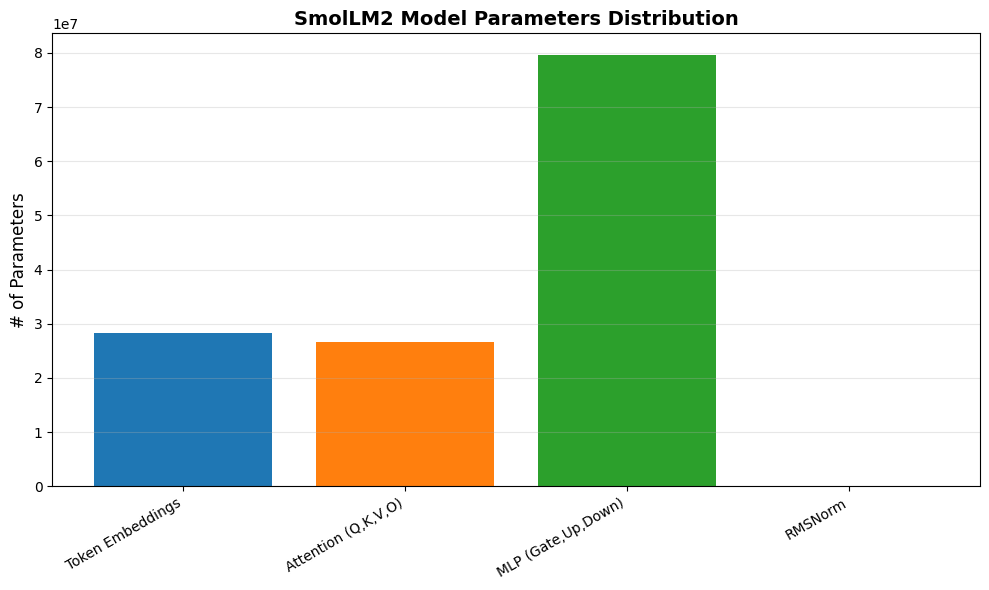


Parameter Breakdown
Token Embeddings                    28,311,552      21.05%
Attention Q                          9,953,280       7.40%
Attention K                          3,317,760       2.47%
Attention V                          3,317,760       2.47%
Attention O                          9,953,280       7.40%
MLP Gate                            26,542,080      19.73%
MLP Up                              26,542,080      19.73%
MLP Down                            26,542,080      19.73%
RMSNorm                                 35,136       0.03%
Output (shared)                              0       0.00%

Total Parameters                   134,515,008
Total (Millions)                        134.52M


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# ============================================================================
# SmolLM2 Model Configuration
# ============================================================================

vocabulary_size = 49152
embedding_dimensions = 576  # n_embd
num_attention_heads = 9
num_kv_heads = 3  # Grouped Query Attention
num_hidden_layers = 30  # Using reduced layers for our training
feed_forward_ratio = 1536 / 576  # intermediate_size / n_embd ≈ 2.67
head_dim = 64

print("=" * 80)
print("SmolLM2 Model Analysis")
print("=" * 80)
print(f"\nModel Configuration:")
print(f"  Vocabulary Size: {vocabulary_size:,}")
print(f"  Embedding Dimensions: {embedding_dimensions}")
print(f"  Hidden Layers: {num_hidden_layers}")
print(f"  Attention Heads: {num_attention_heads}")
print(f"  Key-Value Heads: {num_kv_heads}")
print(f"  Head Dimension: {head_dim}")
print(f"  Intermediate Size: {int(embedding_dimensions * feed_forward_ratio)}")

# ============================================================================
# Parameter Count Breakdown
# ============================================================================

parameter_counts = {
    "Token Embeddings": vocabulary_size * embedding_dimensions,
    
    # Grouped Query Attention: Q has n_head * head_dim, K/V have n_kv_head * head_dim
    "Attention Q": (embedding_dimensions * num_attention_heads * head_dim) * num_hidden_layers,
    "Attention K": (embedding_dimensions * num_kv_heads * head_dim) * num_hidden_layers,
    "Attention V": (embedding_dimensions * num_kv_heads * head_dim) * num_hidden_layers,
    "Attention O": (num_attention_heads * head_dim * embedding_dimensions) * num_hidden_layers,
    
    # SwiGLU MLP: gate_proj, up_proj, down_proj (no biases)
    "MLP Gate": (embedding_dimensions * int(embedding_dimensions * feed_forward_ratio)) * num_hidden_layers,
    "MLP Up": (embedding_dimensions * int(embedding_dimensions * feed_forward_ratio)) * num_hidden_layers,
    "MLP Down": (int(embedding_dimensions * feed_forward_ratio) * embedding_dimensions) * num_hidden_layers,
    
    # RMSNorm: only weight parameters (no bias)
    "RMSNorm": embedding_dimensions * (2 * num_hidden_layers + 1),  # input_norm + post_attn_norm per layer + final norm
    
    "Output (shared)": 0,  # Tied with embeddings
}

# Combine attention for visualization
attention_params = (
    parameter_counts["Attention Q"] + 
    parameter_counts["Attention K"] + 
    parameter_counts["Attention V"] + 
    parameter_counts["Attention O"]
)

mlp_params = (
    parameter_counts["MLP Gate"] + 
    parameter_counts["MLP Up"] + 
    parameter_counts["MLP Down"]
)

viz_params = {
    "Token Embeddings": parameter_counts["Token Embeddings"],
    "Attention (Q,K,V,O)": attention_params,
    "MLP (Gate,Up,Down)": mlp_params,
    "RMSNorm": parameter_counts["RMSNorm"],
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(viz_params.keys(), viz_params.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title("SmolLM2 Model Parameters Distribution", fontsize=14, fontweight='bold')
plt.ylabel("# of Parameters", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

# Detailed breakdown
print("\n" + "=" * 80)
print("Parameter Breakdown")
print("=" * 80)

total_parameter_count = sum(parameter_counts.values())

for name, count in parameter_counts.items():
    print(f"{name:25s} {count:20,d} {count / total_parameter_count * 100:10.2f}%")

print(f"\n{'Total Parameters':25s} {total_parameter_count:20,d}")
print(f"{'Total (Millions)':25s} {total_parameter_count/1e6:20.2f}M")






In [19]:
aspect_ratio = embedding_dimensions / num_hidden_layers

print(f"Network has an aspect ratio of {aspect_ratio:.2f}")

Network has an aspect ratio of 19.20


In [20]:
heads_ratio = embedding_dimensions / num_attention_heads

print(f"Heads ratio is {heads_ratio:.2f}")

Heads ratio is 64.00


In [21]:
# ============================================================================
# Memory Requirements
# ============================================================================

print("\n" + "=" * 80)
print("Memory Requirements")
print("=" * 80)

# Model weights
bytes_per_param_fp32 = 4
bytes_per_param_fp16 = 2
bytes_per_param_bf16 = 2

model_memory_fp32 = total_parameter_count * bytes_per_param_fp32 / (1024**3)
model_memory_fp16 = total_parameter_count * bytes_per_param_fp16 / (1024**3)
model_memory_bf16 = total_parameter_count * bytes_per_param_bf16 / (1024**3)

print(f"\nModel Weights:")
print(f"  FP32:    {model_memory_fp32:.2f} GB")
print(f"  FP16:    {model_memory_fp16:.2f} GB")
print(f"  BF16:    {model_memory_bf16:.2f} GB")

# Training memory (optimizer states, gradients, activations)
# AdamW: 2 states per parameter (momentum and variance)
optimizer_memory_fp32 = total_parameter_count * 8 / (1024**3)  # 2 states * 4 bytes
gradient_memory_fp32 = total_parameter_count * 4 / (1024**3)

print(f"\nTraining Memory (FP32 optimizer):")
print(f"  Model (FP16/BF16):  {model_memory_fp16:.2f} GB")
print(f"  Gradients (FP32):   {gradient_memory_fp32:.2f} GB")
print(f"  Optimizer States:   {optimizer_memory_fp32:.2f} GB")

# Activation memory (depends on batch size and sequence length)
batch_size = 4
sequence_length = 256

# Rough estimate: ~34 * layers * hidden_size * batch * seq_len bytes
activation_memory_estimate = (34 * num_hidden_layers * embedding_dimensions * 
                              batch_size * sequence_length) / (1024**3)

print(f"  Activations (B={batch_size}, T={sequence_length}): ~{activation_memory_estimate:.2f} GB")

total_training_memory = (model_memory_fp16 + gradient_memory_fp32 + 
                         optimizer_memory_fp32 + activation_memory_estimate)

print(f"\n  Total Training Memory: ~{total_training_memory:.2f} GB")


Memory Requirements

Model Weights:
  FP32:    0.50 GB
  FP16:    0.25 GB
  BF16:    0.25 GB

Training Memory (FP32 optimizer):
  Model (FP16/BF16):  0.25 GB
  Gradients (FP32):   0.50 GB
  Optimizer States:   1.00 GB
  Activations (B=4, T=256): ~0.56 GB

  Total Training Memory: ~2.31 GB


In [22]:
# ============================================================================
# Chinchilla Scaling Laws
# ============================================================================

print("\n" + "=" * 80)
print("Chinchilla Scaling Laws")
print("=" * 80)

"""
Chinchilla optimal scaling:
- For compute budget C, optimal parameters N and tokens D satisfy:
  N_opt ≈ (C / 6)^0.5 / k_N
  D_opt ≈ (C / 6)^0.5 / k_D
  
- Simplified: D_opt ≈ 20 * N (20 tokens per parameter)
- Conservative: D_opt ≈ 10-30 * N
"""

# Chinchilla recommendation: ~20 tokens per parameter
chinchilla_tokens = 20 * total_parameter_count

print(f"\nModel Parameters: {total_parameter_count/1e6:.2f}M")
print(f"\nChinchilla Optimal Training Tokens:")
print(f"  Conservative (10x): {10 * total_parameter_count/1e9:.2f}B tokens")
print(f"  Standard (20x):     {20 * total_parameter_count/1e9:.2f}B tokens")
print(f"  Aggressive (30x):   {30 * total_parameter_count/1e9:.2f}B tokens")

# Compute budget for optimal training
compute_budget_flops = 6 * total_parameter_count * chinchilla_tokens

print(f"\nCompute Budget (Chinchilla optimal):")
print(f"  Total FLOPs: {compute_budget_flops/1e15:.2f} PFLOPs")
print(f"  With 5000 steps, tokens/step: {chinchilla_tokens/5000:,.0f}")

# Actual training estimate
training_steps = 5000
tokens_per_step = batch_size * sequence_length
total_training_tokens = training_steps * tokens_per_step

print(f"\nOur Training Configuration:")
print(f"  Steps: {training_steps:,}")
print(f"  Tokens per step: {tokens_per_step}")
print(f"  Total tokens: {total_training_tokens:,} ({total_training_tokens/1e6:.2f}M)")
print(f"  Ratio to Chinchilla optimal: {total_training_tokens/chinchilla_tokens:.4f}x")

if total_training_tokens < chinchilla_tokens:
    additional_tokens_needed = chinchilla_tokens - total_training_tokens
    additional_steps_needed = additional_tokens_needed / tokens_per_step
    print(f"\n  ⚠️  Under-trained by Chinchilla standards")
    print(f"  Additional tokens needed: {additional_tokens_needed/1e6:.2f}M")
    print(f"  Additional steps needed: {additional_steps_needed:,.0f}")
else:
    print(f"\n  ✅ Training budget meets Chinchilla recommendations")


Chinchilla Scaling Laws

Model Parameters: 134.52M

Chinchilla Optimal Training Tokens:
  Conservative (10x): 1.35B tokens
  Standard (20x):     2.69B tokens
  Aggressive (30x):   4.04B tokens

Compute Budget (Chinchilla optimal):
  Total FLOPs: 2171.31 PFLOPs
  With 5000 steps, tokens/step: 538,060

Our Training Configuration:
  Steps: 5,000
  Tokens per step: 1024
  Total tokens: 5,120,000 (5.12M)
  Ratio to Chinchilla optimal: 0.0019x

  ⚠️  Under-trained by Chinchilla standards
  Additional tokens needed: 2685.18M
  Additional steps needed: 2,622,246


In [23]:
# ============================================================================
# FLOPs Analysis
# ============================================================================

print("\n" + "=" * 80)
print("FLOPs Analysis (per token)")
print("=" * 80)

def compute_flops_per_token(params, layers, d_model, d_ff, seq_len):
    """
    Compute FLOPs per token for transformer model
    Formula: FLOPs ≈ 6 * N + 12 * L * H * S
    Where:
    - N = number of parameters
    - L = number of layers
    - H = hidden size
    - S = sequence length
    """
    # Embedding lookup (negligible)
    embedding_flops = 0
    
    # Attention: Q,K,V projections + attention computation + output projection
    # Q,K,V: 3 * 2 * d_model^2 (matrix multiply)
    qkv_flops = 2 * 3 * d_model * d_model
    # Attention scores: 2 * seq_len * d_model
    attn_scores_flops = 2 * seq_len * d_model
    # Attention output: 2 * seq_len * d_model
    attn_output_flops = 2 * seq_len * d_model
    # Output projection: 2 * d_model^2
    output_proj_flops = 2 * d_model * d_model
    
    attention_flops_per_layer = qkv_flops + attn_scores_flops + attn_output_flops + output_proj_flops
    
    # MLP: gate + up + down (3 linear layers)
    # gate: 2 * d_model * d_ff
    # up: 2 * d_model * d_ff
    # down: 2 * d_ff * d_model
    mlp_flops_per_layer = 2 * d_model * d_ff * 3
    
    # Total per layer
    flops_per_layer = attention_flops_per_layer + mlp_flops_per_layer
    
    # All layers
    total_flops = layers * flops_per_layer
    
    # Output layer (lm_head)
    output_flops = 2 * d_model * vocabulary_size
    
    return total_flops + output_flops, attention_flops_per_layer, mlp_flops_per_layer

# Forward pass FLOPs per token
d_ff = int(embedding_dimensions * feed_forward_ratio)
forward_flops, attn_flops, mlp_flops = compute_flops_per_token(
    total_parameter_count, num_hidden_layers, embedding_dimensions, d_ff, sequence_length
)

# Simplified formula: FLOPs ≈ 6N (forward + backward)
forward_flops_simple = 2 * total_parameter_count
backward_flops_simple = 4 * total_parameter_count
total_flops_simple = 6 * total_parameter_count

print(f"\nSimplified Estimate (per token):")
print(f"  Forward pass:  ~{forward_flops_simple/1e9:.2f} GFLOPs")
print(f"  Backward pass: ~{backward_flops_simple/1e9:.2f} GFLOPs")
print(f"  Total:         ~{total_flops_simple/1e9:.2f} GFLOPs")

print(f"\nDetailed Estimate (per token):")
print(f"  Attention (per layer): ~{attn_flops/1e9:.3f} GFLOPs")
print(f"  MLP (per layer):       ~{mlp_flops/1e9:.3f} GFLOPs")
print(f"  Forward pass total:    ~{forward_flops/1e9:.2f} GFLOPs")
print(f"  Forward + Backward:    ~{forward_flops * 3 / 1e9:.2f} GFLOPs")

# Per batch
flops_per_batch = total_flops_simple * batch_size * sequence_length
print(f"\nPer Batch (B={batch_size}, T={sequence_length}):")
print(f"  Total FLOPs: ~{flops_per_batch/1e12:.2f} TFLOPs")




FLOPs Analysis (per token)

Simplified Estimate (per token):
  Forward pass:  ~0.27 GFLOPs
  Backward pass: ~0.54 GFLOPs
  Total:         ~0.81 GFLOPs

Detailed Estimate (per token):
  Attention (per layer): ~0.003 GFLOPs
  MLP (per layer):       ~0.005 GFLOPs
  Forward pass total:    ~0.31 GFLOPs
  Forward + Backward:    ~0.94 GFLOPs

Per Batch (B=4, T=256):
  Total FLOPs: ~0.83 TFLOPs


In [24]:

# ============================================================================
# Training Time Estimates
# ============================================================================

print("\n" + "=" * 80)
print("Training Time Estimates (T4 GPU)")
print("=" * 80)

# T4 theoretical: 65 TFLOPs (FP16 with Tensor Cores)
# Practical: ~20-30% efficiency
t4_tflops_practical = 65 * 0.25  # ~16 TFLOPs practical

# Time per step
flops_per_step = flops_per_batch
time_per_step_seconds = flops_per_step / (t4_tflops_practical * 1e12)

print(f"\nT4 GPU (FP16 Tensor Cores):")
print(f"  Theoretical peak: 65 TFLOPs")
print(f"  Practical (25% efficiency): {t4_tflops_practical:.1f} TFLOPs")
print(f"\nEstimated time per step: {time_per_step_seconds:.3f} seconds")
print(f"Estimated time for 5000 steps: {time_per_step_seconds * 5000 / 3600:.2f} hours")

# MFU (Model FLOPs Utilization)
print(f"\n" + "=" * 80)
print("Model FLOPs Utilization (MFU)")
print("=" * 80)
print(f"\nMFU = (Actual FLOPs/s) / (Peak FLOPs/s)")
print(f"Target MFU for efficient training: 30-50%")
print(f"Our estimate assumes: 25% MFU")

print("\n" + "=" * 80)


Training Time Estimates (T4 GPU)

T4 GPU (FP16 Tensor Cores):
  Theoretical peak: 65 TFLOPs
  Practical (25% efficiency): 16.2 TFLOPs

Estimated time per step: 0.051 seconds
Estimated time for 5000 steps: 0.07 hours

Model FLOPs Utilization (MFU)

MFU = (Actual FLOPs/s) / (Peak FLOPs/s)
Target MFU for efficient training: 30-50%
Our estimate assumes: 25% MFU

